# IMPORTING LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import joblib
from tkinter import *

# IMPORTING DATASET

In [ ]:
data = pd.read_csv("/content/diamonds[1].csv")

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# DATA PREPARATION

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [ ]:
data.shape

(50000, 10)

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# DATA CLEANSING

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.duplicated().sum()

126

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(49874, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [ ]:
data.shape

(49857, 10)

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
#check the outliers

In [ ]:
def boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

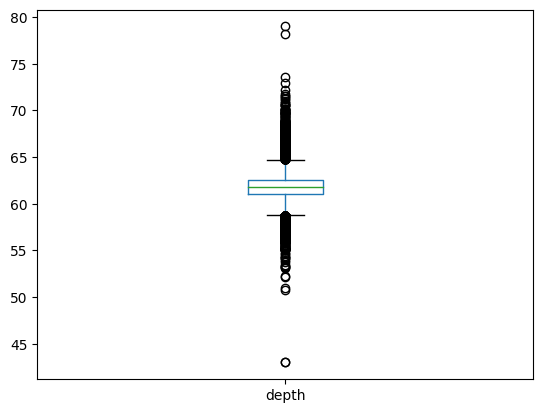

In [ ]:
boxplot(data, "depth")

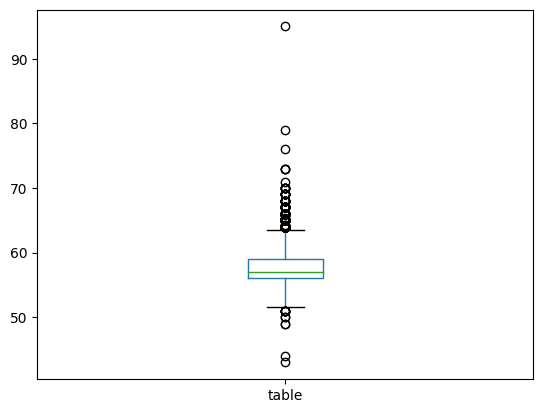

In [ ]:
boxplot(data, "table")

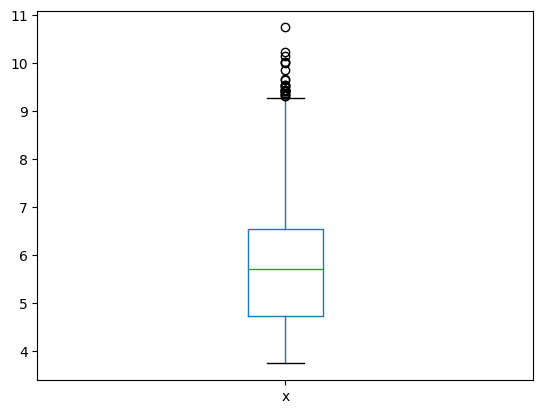

In [ ]:
boxplot(data, "x")

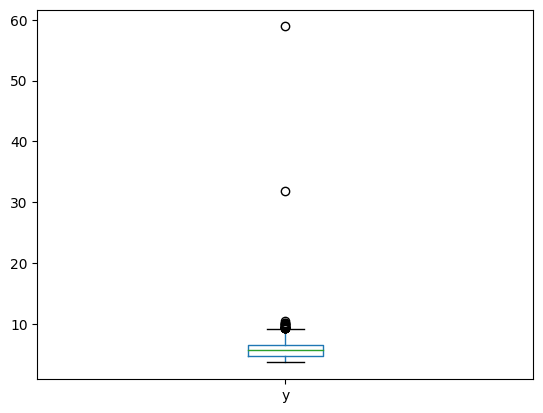

In [ ]:
boxplot(data, "y")

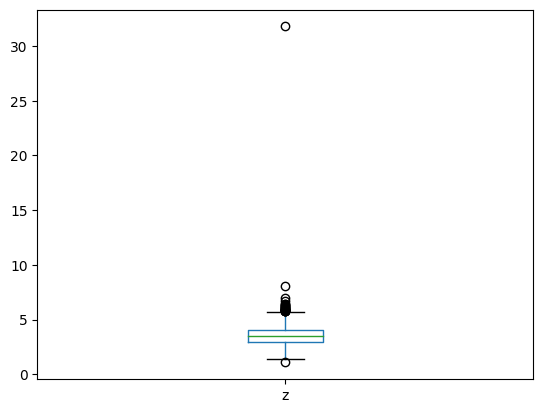

In [ ]:
boxplot(data, "z")

In [ ]:
#remove outliers

In [ ]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 -Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  list = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return list

In [ ]:
#create emPty list

In [ ]:
index_list = []
for feature in ["depth", "table", "x", "y", "z"]:
  index_list.extend(outliers(data, feature))


In [ ]:
#define a function which return a clean dataframe without outliers

In [ ]:
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
remove(data, index_list)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#create the data into new variable that has been cleaned

In [ ]:
data_clean = remove(data, index_list)

In [ ]:
data_clean.shape

(47135, 10)

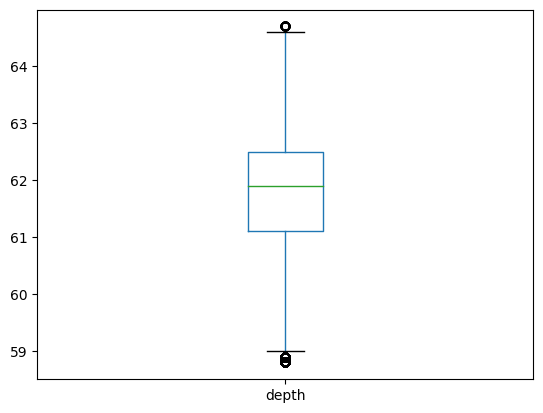

In [ ]:
boxplot(data_clean, "depth")

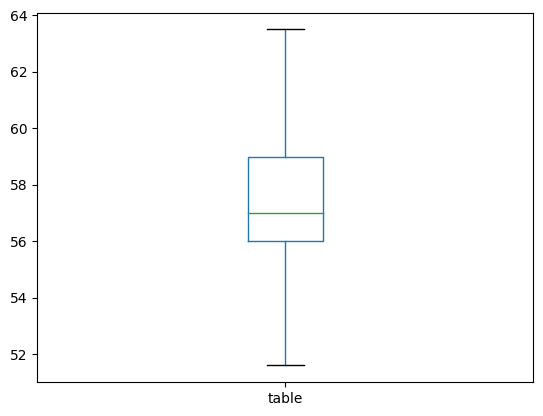

In [ ]:
boxplot(data_clean, "table")

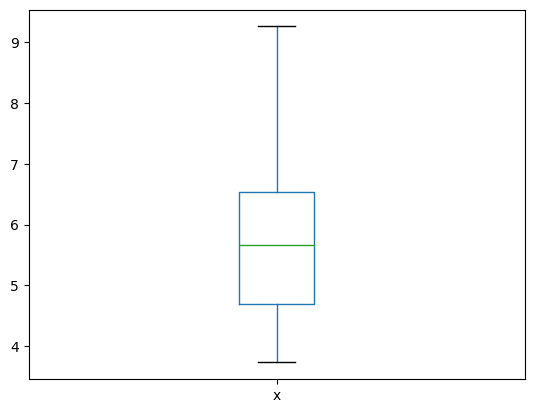

In [ ]:
boxplot(data_clean, "x")

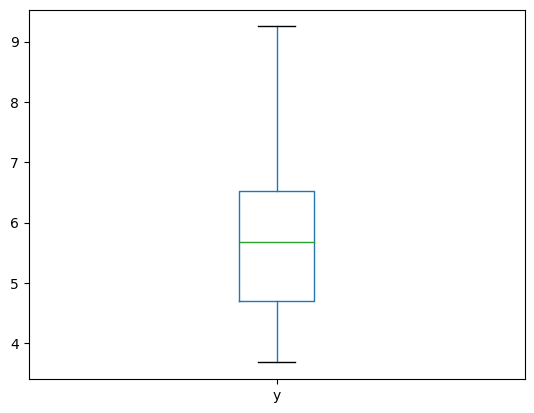

In [ ]:
boxplot(data_clean, "y")

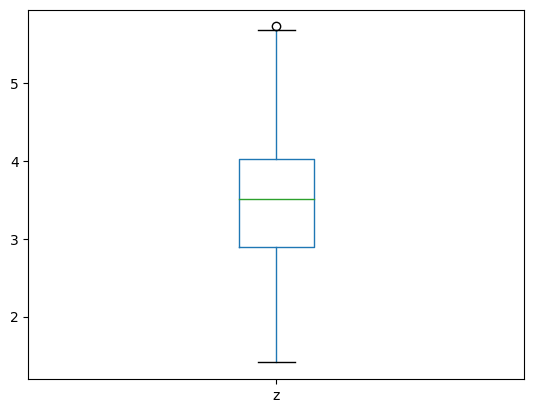

In [ ]:
boxplot(data_clean, "z")

In [ ]:
#from the graph above, we know that there are no outliers anymore

In [ ]:
#Label Encoding, change the categorical format into numeric format

In [ ]:
data_clean.select_dtypes(include=['object']).columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
category_col = data_clean.select_dtypes(include=['object']).columns

In [ ]:
en=LabelEncoder()
for i in category_col:
  data_clean[i]=en.fit_transform(data_clean[i])

In [ ]:
data_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['cut'])
le_cut_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le = preprocessing.LabelEncoder()
le.fit(data['clarity'])
le_clarity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

le = preprocessing.LabelEncoder()
le.fit(data['color'])
le_color_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(le_cut_mapping)
print(le_clarity_mapping)
print(le_color_mapping)



{'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
{'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}
{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}


# EXPLORATORY DATA ANALYZE

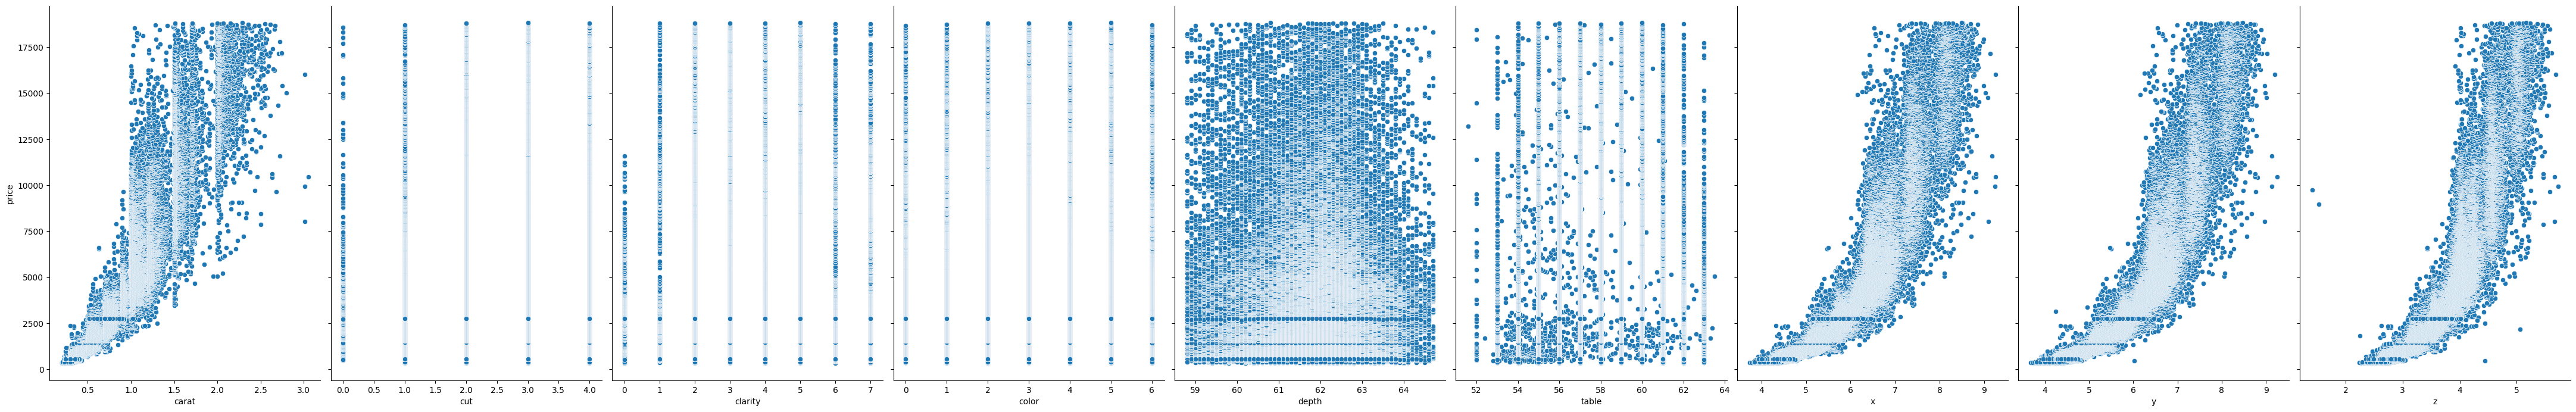

In [ ]:
sns.pairplot(data_clean, x_vars=['carat','cut','clarity','color','depth','table','x','y','z'], y_vars='price', height=7, aspect=0.7,)

In [ ]:
#from the graph above we see that variable carat, x, y, and z have correlation to dependent variable which is price

In [ ]:
#create the features into variabel X and price column as dependent variabel into variabel y

In [ ]:
X = data_clean.drop('price', axis=1)
y = data_clean['price']

In [ ]:
#splitting the dataset into the training set and test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#import the models

In [ ]:
data_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


# MACHINE LEARNING

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Prediction on Data

In [ ]:
y_predict1 = lr.predict(X_test)
y_predict2 = svm.predict(X_test)
y_predict3 = rf.predict(X_test)
y_predict4 = gbr.predict(X_test)
y_predict5 = xg.predict(X_test)

In [ ]:
#Evaluating the Algorithm

In [ ]:
score1 = metrics.r2_score(y_test,y_predict1)
score2 = metrics.r2_score(y_test,y_predict2)
score3 = metrics.r2_score(y_test,y_predict3)
score4 = metrics.r2_score(y_test,y_predict4)
score5 = metrics.r2_score(y_test,y_predict5)

In [ ]:
print(score1, score2, score3, score4, score5)

0.8998383996271718 -0.11709968770392032 0.9828639036804258 0.9745403019020784 0.9830403068101778


In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],
              'R2_SCORE':[score1,score2,score3,score4,score5]})

In [ ]:
final_data

,Models,R2_SCORE
0,LR,0.899838
1,SVR,-0.117100
2,RF,0.982864
3,GB,0.974540
4,XGR,0.983040


In [ ]:
rf.feature_importances_

array([0.66849421, 0.00113937, 0.02914705, 0.06469181, 0.00294765,
       0.00219801, 0.00600113, 0.21677244, 0.00860832])

In [ ]:
pd.Series(rf.feature_importances_,index=X_train.columns)

carat      0.668494
cut        0.001139
color      0.029147
clarity    0.064692
depth      0.002948
table      0.002198
x          0.006001
y          0.216772
z          0.008608
dtype: float64

In [ ]:
#Feature Importances

In [ ]:
fea = pd.Series(rf.feature_importances_,index=X_train.columns)

In [ ]:
fea.plot(kind='barh')

In [ ]:
gbr.feature_importances_

In [ ]:
fea = pd.Series(gbr.feature_importances_,index=X_train.columns)

In [ ]:
fea.plot(kind='barh')

In [ ]:
xg.feature_importances_

In [ ]:
fea = pd.Series(xg.feature_importances_,index=X_train.columns)

In [ ]:
fea.plot(kind='barh')

In [ ]:
#save the model

In [ ]:
X = data_clean.drop('price', axis=1)
y = data_clean['price']

In [ ]:
xgb=XGBRegressor()

In [ ]:
xgb.fit(X,y)

In [ ]:
joblib.dump(xgb,'diamond_price_predict')

In [ ]:
data_clean.head()

In [ ]:
model = joblib.load('diamond_price_predict')

In [ ]:
#trial of the machine learning

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'carat':0.3,
    'cut':2,
    'color':1,
    'clarity':2,
    'depth':59,
    'table':62,
    'x':3.08,
    'y':3.1,
    'z':2.53,
},index=[0])

In [ ]:
df

In [ ]:
model.predict(df)

In [ ]:
#from the model predict we know that the diamond with value of feature above has price $387.31427